# Kaggle Competition: House Prices: Advanced Regression Techniques

El objetivo de [esta competición](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) es **predecir el precio de las casas** en Ames, Iowa, utilizando un conjunto de datos de entrenamiento que contiene 79 variables. La métrica de evaluación es el **error cuadrático medio** (RMSE).

![image](https://www.kaggle.com/competitions/5407/images/header)


In [115]:
import pandas as pd
import numpy as np


TRAIN_CSV = '../data/train.csv'
TEST_CSV = '../data/test.csv'


train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
data = pd.concat([train_df, test_df], keys=['train', 'test'])
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
train 0        1          60       RL         65.0     8450   Pave   NaN   
      1        2          20       RL         80.0     9600   Pave   NaN   
      2        3          60       RL         68.0    11250   Pave   NaN   
      3        4          70       RL         60.0     9550   Pave   NaN   
      4        5          60       RL         84.0    14260   Pave   NaN   
...          ...         ...      ...          ...      ...    ...   ...   
test  1454  2915         160       RM         21.0     1936   Pave   NaN   
      1455  2916         160       RM         21.0     1894   Pave   NaN   
      1456  2917          20       RL        160.0    20000   Pave   NaN   
      1457  2918          85       RL         62.0    10441   Pave   NaN   
      1458  2919          60       RL         74.0     9627   Pave   NaN   

           LotShape LandContour Utilities  ... PoolArea PoolQC  Fence  \
train 0         Reg         Lvl    AllPub  ...        0    NaN    NaN   
      1         Reg         Lvl    AllPub  ...        0    NaN    NaN   
      2         IR1         Lvl    AllPub  ...        0    NaN    NaN   
      3         IR1         Lvl    AllPub  ...        0    NaN    NaN   
      4         IR1         Lvl    AllPub  ...        0    NaN    NaN   
...             ...         ...       ...  ...      ...    ...    ...   
test  1454      Reg         Lvl    AllPub  ...        0    NaN    NaN   
      1455      Reg         Lvl    AllPub  ...        0    NaN    NaN   
      1456      Reg         Lvl    AllPub  ...        0    NaN    NaN   
      1457      Reg         Lvl    AllPub  ...        0    NaN  MnPrv   
      1458      Reg         Lvl    AllPub  ...        0    NaN    NaN   

           MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  \
train 0            NaN       0      2   2008        WD         Normal   
      1            NaN       0      5   2007        WD         Normal   
      2            NaN       0      9   2008        WD         Normal   
      3            NaN       0      2   2006        WD        Abnorml   
      4            NaN       0     12   2008        WD         Normal   
...                ...     ...    ...    ...       ...            ...   
test  1454         NaN       0      6   2006        WD         Normal   
      1455         NaN       0      4   2006        WD        Abnorml   
      1456         NaN       0      9   2006        WD        Abnorml   
      1457        Shed     700      7   2006        WD         Normal   
      1458         NaN       0     11   2006        WD         Normal   

            SalePrice  
train 0      208500.0  
      1      181500.0  
      2      223500.0  
      3      140000.0  
      4      250000.0  
...               ...  
test  1454        NaN  
      1455        NaN  
      1456        NaN  
      1457        NaN  
      1458        NaN  

[2919 rows x 81 columns]

In [116]:
data['TotalSqft'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['BsmtUnfSF'] + data['1stFlrSF'] + data['2ndFlrSF'] + data['LowQualFinSF']

data['TotalBaths'] = data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath'] + data['FullBath'] + 0.5 * data['HalfBath']

data['TotalDeck'] = data['WoodDeckSF'] + data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']


drop_columns = ['Alley', 'Electrical', 'LowQualFinSF', 'FireplaceQu', 'PoolArea', 'PoolQC', 'Fence', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'WoodDeckSF',
                'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MasVnrType', 'MiscFeature']
clean_data = data.drop(columns = drop_columns)

In [117]:
x = clean_data.drop(columns = 'SalePrice')
y = clean_data['SalePrice']

In [119]:
num_cols = x.select_dtypes(include=["int64", "float64"]).columns
cat_cols = x.select_dtypes(include=["object"]).columns

/tmp/ipykernel_107598/237398425.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = x.select_dtypes(include=["object"]).columns


In [120]:
from sklearn.impute import SimpleImputer


x[cat_cols] = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent').fit_transform(x[cat_cols])
x[num_cols] = SimpleImputer(missing_values = np.nan, strategy = 'median').fit_transform(x[num_cols])

In [121]:
from sklearn.preprocessing import StandardScaler

num_columns = list(num_cols)
scaler = StandardScaler()
x_numeric_df = x[num_columns]
x_numeric_scaled_data = scaler.fit_transform(x_numeric_df)

x_num_scaled_df = pd.DataFrame(x_numeric_scaled_data, index=x_numeric_df.index, columns=x_numeric_df.columns,)

x_num_scaled_df.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
train 0 -1.731458    0.067331    -0.191815 -0.217879     0.646183   
      1 -1.730271   -0.873616     0.511940 -0.072044    -0.063185   
      2 -1.729084    0.067331    -0.051064  0.137197     0.646183   
      3 -1.727897    0.302568    -0.426400 -0.078385     0.646183   
      4 -1.726711    0.067331     0.699608  0.518903     1.355551   

         OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  GrLivArea  ...  \
train 0    -0.507284   1.046258      0.896833    0.529034   0.413547  ...   
      1     2.188279   0.154764     -0.395604   -0.567016  -0.471891  ...   
      2    -0.507284   0.980221      0.848965    0.338903   0.563755  ...   
      3    -0.507284  -1.859351     -0.682812   -0.567016   0.427382  ...   
      4    -0.507284   0.947203      0.753229    1.390216   1.378042  ...   

         Fireplaces  GarageYrBlt  GarageCars  GarageArea   MiscVal    MoSold  \
train 0   -0.924311     0.998954    0.306418    0.348888 -0.089592 -1.552184   
      1    0.623632    -0.086940    0.306418   -0.059804 -0.089592 -0.446925   
      2    0.623632     0.918517    0.306418    0.627542 -0.089592  1.026753   
      3    0.623632     0.797862    1.619830    0.785446 -0.089592 -1.552184   
      4    0.623632     0.878299    1.619830    1.686426 -0.089592  2.132012   

           YrSold  TotalSqft  TotalBaths  TotalDeck  
train 0  0.157646   0.016503    1.586238  -0.762276  
      1 -0.602962  -0.035652    0.348705   0.719030  
      2  0.157646   0.190351    1.586238  -0.881030  
      3 -1.363569  -0.098982   -0.270061   0.775282  
      4  0.157646   0.981361    1.586238   0.581524  

[5 rows x 23 columns]

In [122]:
from sklearn.preprocessing import LabelEncoder

cat_list = list(cat_cols)

def label_encode_column(df, list):
    le = LabelEncoder()
    for column in list:
        df[column] = le.fit_transform(df[column])
    return df

cat = x[cat_cols]

cat_encoded = label_encode_column(cat, cat_list)

cat_encoded

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
train 0            3       1         3            3          0          4   
      1            3       1         3            3          0          2   
      2            3       1         0            3          0          4   
      3            3       1         0            3          0          0   
      4            3       1         0            3          0          2   
...              ...     ...       ...          ...        ...        ...   
test  1454         4       1         3            3          0          4   
      1455         4       1         3            3          0          4   
      1456         3       1         3            3          0          4   
      1457         3       1         3            3          0          4   
      1458         3       1         3            3          0          4   

            LandSlope  Neighborhood  Condition1  Condition2  ...  CentralAir  \
train 0             0             5           2           2  ...           1   
      1             0            24           1           2  ...           1   
      2             0             5           2           2  ...           1   
      3             0             6           2           2  ...           1   
      4             0            15           2           2  ...           1   
...               ...           ...         ...         ...  ...         ...   
test  1454          0            10           2           2  ...           1   
      1455          0            10           2           2  ...           1   
      1456          0            11           2           2  ...           1   
      1457          0            11           2           2  ...           1   
      1458          1            11           2           2  ...           1   

            KitchenQual  Functional  GarageType  GarageFinish  GarageQual  \
train 0               2           6           1             1           4   
      1               3           6           1             1           4   
      2               2           6           1             1           4   
      3               2           6           5             2           4   
      4               2           6           1             1           4   
...                 ...         ...         ...           ...         ...   
test  1454            3           6           1             2           4   
      1455            3           6           4             2           4   
      1456            3           6           5             2           4   
      1457            3           6           1             2           4   
      1458            3           6           1             0           4   

            GarageCond  PavedDrive  SaleType  SaleCondition  
train 0              4           2         8              4  
      1              4           2         8              4  
      2              4           2         8              4  
      3              4           2         8              0  
      4              4           2         8              4  
...                ...         ...       ...            ...  
test  1454           4           2         8              4  
      1455           4           2         8              0  
      1456           4           2         8              0  
      1457           4           2         8              4  
      1458           4           2         8              4  

[2919 rows x 36 columns]

In [123]:
x_clean = pd.concat([x_num_scaled_df, cat_encoded], axis=1)
x_clean

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
train 0    -1.731458    0.067331    -0.191815 -0.217879     0.646183   
      1    -1.730271   -0.873616     0.511940 -0.072044    -0.063185   
      2    -1.729084    0.067331    -0.051064  0.137197     0.646183   
      3    -1.727897    0.302568    -0.426400 -0.078385     0.646183   
      4    -1.726711    0.067331     0.699608  0.518903     1.355551   
...              ...         ...          ...       ...          ...   
test  1454  1.726711    2.419700    -2.256162 -1.043937    -1.481920   
      1455  1.727897    2.419700    -2.256162 -1.049263    -1.481920   
      1456  1.729084   -0.873616     4.265298  1.246808    -0.772552   
      1457  1.730271    0.655424    -0.332566  0.034605    -0.772552   
      1458  1.731458    0.067331     0.230438 -0.068620     0.646183   

            OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  GrLivArea  ...  \
train 0       -0.507284   1.046258      0.896833    0.529034   0.413547  ...   
      1        2.188279   0.154764     -0.395604   -0.567016  -0.471891  ...   
      2       -0.507284   0.980221      0.848965    0.338903   0.563755  ...   
      3       -0.507284  -1.859351     -0.682812   -0.567016   0.427382  ...   
      4       -0.507284   0.947203      0.753229    1.390216   1.378042  ...   
...                 ...        ...           ...         ...        ...  ...   
test  1454     1.289758  -0.043346     -0.682812   -0.567016  -0.807883  ...   
      1455    -0.507284  -0.043346     -0.682812   -0.567016  -0.807883  ...   
      1456     1.289758  -0.373528      0.561757   -0.567016  -0.546995  ...   
      1457    -0.507284   0.683057      0.370284   -0.567016  -1.049006  ...   
      1458    -0.507284   0.716075      0.466021   -0.041359   0.986710  ...   

            CentralAir  KitchenQual  Functional  GarageType  GarageFinish  \
train 0              1            2           6           1             1   
      1              1            3           6           1             1   
      2              1            2           6           1             1   
      3              1            2           6           5             2   
      4              1            2           6           1             1   
...                ...          ...         ...         ...           ...   
test  1454           1            3           6           1             2   
      1455           1            3           6           4             2   
      1456           1            3           6           5             2   
      1457           1            3           6           1             2   
      1458           1            3           6           1             0   

            GarageQual  GarageCond  PavedDrive  SaleType  SaleCondition  
train 0              4           4           2         8              4  
      1              4           4           2         8              4  
      2              4           4           2         8              4  
      3              4           4           2         8              0  
      4              4           4           2         8              4  
...                ...         ...         ...       ...            ...  
test  1454           4           4           2         8              4  
      1455           4           4           2         8              0  
      1456           4           4           2         8              0  
      1457           4           4           2         8              4  
      1458           4           4           2         8              4  

[2919 rows x 59 columns]

In [127]:
from sklearn.model_selection import train_test_split


SPLIT_RATIO = 1
SEED = 42


# estos son los datos limpios que usaremos para predecir y enviar a Kaggle
X_test = x_clean.xs('test')

# estos son los datos que usaremos para entrenar y validar nuestro modelo
X_train = x_clean.xs('train')
y_train = y.xs('train')

# dividimos los datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=SPLIT_RATIO, random_state=SEED
)

In [128]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [130]:
from sklearn.metrics import root_mean_squared_error

# obtenemos las predicciones para los datos de validación
y_pred = model.predict(X_val)

# calculamos el error cuadrático medio comparando las predicciones con los valores reales
mse = root_mean_squared_error(y_val, y_pred)
f"Mean Squared Error: {mse:.2f}"

'Mean Squared Error: 5044.88'

In [131]:
test_predictions = model.predict(X_test)
test_ids = test_df['Id']
submission_data = {
    'Id': test_ids,
    'SalePrice': test_predictions,
}
submission_df = pd.DataFrame(submission_data)
submission_df.head()
submission_df.to_csv('../data/submission.csv', index=False)

## 1. Cargar los datos

Como siempre en un proyecto de Machine Learning, lo primero que debemos hacer es cargar los datos. Para ello, seguiremos los siguientes pasos:

1. Darnos de alta en la plataforma de [Kaggle](https://www.kaggle.com/)
2. [Registrarnos en la competición](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview).
3. Descargar los datos. Para ello nos dirigimos a la pestaña `Data` y descargamos el zip con los archivos: `train.csv`, `test.csv`, `data_description.txt` y `sample_submission.csv`, 
4. Los colocamos dentro de una carpeta llamada `data` en la raíz del proyecto. Recuerda que no subimos los datos a GitHub.
5. Cargamos los datos en un DataFrame de pandas.

In [23]:
import pandas as pd


TRAIN_CSV = '../data/train.csv'
TEST_CSV = '../data/test.csv'


train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
all_data_df = pd.concat([train_df, test_df], keys=['train', 'test'])
all_data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
train 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

        MoSold YrSold  SaleType  SaleCondition  SalePrice  
train 0      2   2008        WD         Normal   208500.0  
      1      5   2007        WD         Normal   181500.0  
      2      9   2008        WD         Normal   223500.0  
      3      2   2006        WD        Abnorml   140000.0  
      4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

Para este ejercicio vamos a simplificar el problema y vamos a reducir el número de variables a utilizar a un set de 10 variables más manejables.

| **Nombre**        | **Descripción**                                                                                                   | **Valoración**                                                                                                                                                                     |
|---------------|---------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **OverallQual**   | Calificación de la calidad general de los materiales y acabados (1 a 10).                                     | Es crucial para la predicción del precio, ya que la calidad de construcción y acabados afecta directamente la percepción de valor y atractivo de la propiedad.                   |
| **GrLivArea**     | Área habitable sobre el nivel del suelo en pies cuadrados.                                                    | Un mayor espacio habitable es más deseable y puede alojar a más personas, incrementando la utilidad y valor de la casa.                                                        |
| **Neighborhood**  | Vecindario dentro de los límites de la ciudad de Ames.                                                        | La ubicación puede influir en la seguridad, acceso a servicios, escuelas y otros factores que afectan la calidad de vida, siendo un factor clave en el valor de la propiedad.    |
| **YearBuilt**     | Año de construcción de la casa.                                                                               | Las casas más nuevas suelen tener instalaciones modernas y menos problemas de mantenimiento, lo cual puede elevar el precio de la propiedad.                                   |
| **GarageCars**    | Capacidad del garaje en términos de número de coches.                                                         | Es un indicador de conveniencia y almacenamiento adicional, factores valorados por los compradores, especialmente en áreas suburbanas.                                          |
| **TotalBsmtSF**   | Área total del sótano en pies cuadrados.                                                                      | Un sótano más grande puede incrementar el espacio utilizable, lo que es atractivo para los compradores y puede aumentar el valor de la propiedad.                               |
| **KitchenQual**   | Califica la calidad de la cocina (Ex a Po).                                                                   | La calidad de la cocina puede influir notablemente en la decisión de compra y la disposición a pagar más, ya que es una de las áreas más importantes de una casa.              |
| **FullBath**      | Número de baños completos sobre el nivel del suelo.                                                           | Más baños completos incrementan la comodidad y funcionalidad de la vivienda, especialmente en familias numerosas, siendo un aspecto muy valorado.                               |
| **MSZoning**      | Clasificación general de la zona de la propiedad (Agrícola, Comercial, Residencial, etc.).                    | Afecta las regulaciones y el uso permitido de la propiedad, influyendo en su valor y en las posibilidades de desarrollo o remodelación.                                         |
| **LotArea**       | Tamaño del lote en pies cuadrados.                                                                            | Un terreno más grande puede ofrecer más privacidad, espacio para actividades al aire libre o futuras ampliaciones de la casa, aumentando su atractivo y valor.                  |
| **LotArea**       | Tamaño del lote en pies cuadrados.                                                                            | Un terreno más grande puede ofrecer más privacidad, espacio para actividades al aire libre o futuras ampliaciones de la casa, aumentando su atractivo y valor.                  |


In [24]:
selected_columns = [
    "OverallQual",
    "GrLivArea",
    "Neighborhood",
    "YearBuilt",
    "GarageCars",
    "TotalBsmtSF",
    "KitchenQual",
    "FullBath",
    "MSZoning",
    "LotArea",
    "MSSubClass",
    "Street",
    "LandContour",
    "Utilities",
    "HouseStyle",
    "ExterCond",
    "Foundation",
    "BsmtQual",
    "HeatingQC",
    "GarageQual",
    "PoolQC",   
    "SalePrice", # incluímos la variable objetivo
]

all_data_df = all_data_df[selected_columns]
all_data_df.head()

OverallQual  GrLivArea Neighborhood  YearBuilt  GarageCars  \
train 0            7       1710      CollgCr       2003         2.0   
      1            6       1262      Veenker       1976         2.0   
      2            7       1786      CollgCr       2001         2.0   
      3            7       1717      Crawfor       1915         3.0   
      4            8       2198      NoRidge       2000         3.0   

         TotalBsmtSF KitchenQual  FullBath MSZoning  LotArea  ...  \
train 0        856.0          Gd         2       RL     8450  ...   
      1       1262.0          TA         2       RL     9600  ...   
      2        920.0          Gd         2       RL    11250  ...   
      3        756.0          Gd         1       RL     9550  ...   
      4       1145.0          Gd         2       RL    14260  ...   

         LandContour Utilities HouseStyle ExterCond Foundation BsmtQual  \
train 0          Lvl    AllPub     2Story        TA      PConc       Gd   
      1          Lvl    AllPub     1Story        TA     CBlock       Gd   
      2          Lvl    AllPub     2Story        TA      PConc       Gd   
      3          Lvl    AllPub     2Story        TA     BrkTil       TA   
      4          Lvl    AllPub     2Story        TA      PConc       Gd   

        HeatingQC GarageQual PoolQC SalePrice  
train 0        Ex         TA    NaN  208500.0  
      1        Ex         TA    NaN  181500.0  
      2        Ex         TA    NaN  223500.0  
      3        Gd         TA    NaN  140000.0  
      4        Ex         TA    NaN  250000.0  

[5 rows x 22 columns]

## 2. Explorar los datos (EDA)

Una vez que hemos cargado los datos, el siguiente paso es explorarlos. Para ello, seguiremos los siguientes pasos:


1. Mostrar un resumen de los datos.


In [25]:
all_data_df.info()

<class 'pandas.DataFrame'>
MultiIndex: 2919 entries, ('train', 0) to ('test', 1458)
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   GrLivArea     2919 non-null   int64  
 2   Neighborhood  2919 non-null   str    
 3   YearBuilt     2919 non-null   int64  
 4   GarageCars    2918 non-null   float64
 5   TotalBsmtSF   2918 non-null   float64
 6   KitchenQual   2918 non-null   str    
 7   FullBath      2919 non-null   int64  
 8   MSZoning      2915 non-null   str    
 9   LotArea       2919 non-null   int64  
 10  MSSubClass    2919 non-null   int64  
 11  Street        2919 non-null   str    
 12  LandContour   2919 non-null   str    
 13  Utilities     2917 non-null   str    
 14  HouseStyle    2919 non-null   str    
 15  ExterCond     2919 non-null   str    
 16  Foundation    2919 non-null   str    
 17  BsmtQual      2838 non-null   str    
 18  HeatingQC     2919

2. Mostrar un resumen de los datos categóricos.


In [26]:
all_data_df.describe(include='object')

/tmp/ipykernel_79917/2941670375.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  all_data_df.describe(include='object')


,Neighborhood,KitchenQual,MSZoning,Street,LandContour,Utilities,HouseStyle,ExterCond,Foundation,BsmtQual,HeatingQC,GarageQual,PoolQC
count,2919,2918,2915,2919,2919,2917,2919,2919,2919,2838,2919,2760,10
unique,25,4,5,2,4,2,8,5,6,4,5,5,3
top,NAmes,TA,RL,Pave,Lvl,AllPub,1Story,TA,PConc,TA,Ex,TA,Ex
freq,443,1492,2265,2907,2622,2916,1471,2538,1308,1283,1493,2604,4


3. Mostrar un resumen de los datos numéricos.


In [27]:
all_data_df.describe()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,MSSubClass,SalePrice
count,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,6.089072,1500.759849,1971.312778,1.766621,1051.777587,1.568003,10168.114080,57.137718,180921.195890
std,1.409947,506.051045,30.291442,0.761624,440.766258,0.552969,7886.996359,42.517628,79442.502883
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,1300.000000,20.000000,34900.000000
25%,5.000000,1126.000000,1953.500000,1.000000,793.000000,1.000000,7478.000000,20.000000,129975.000000
50%,6.000000,1444.000000,1973.000000,2.000000,989.500000,2.000000,9453.000000,50.000000,163000.000000
75%,7.000000,1743.500000,2001.000000,2.000000,1302.000000,2.000000,11570.000000,70.000000,214000.000000
max,10.000000,5642.000000,2010.000000,5.000000,6110.000000,4.000000,215245.000000,190.000000,755000.000000


4. Mostrar un resumen de los datos nulos.


In [28]:
all_data_df.isnull().sum()

OverallQual        0
GrLivArea          0
Neighborhood       0
YearBuilt          0
GarageCars         1
TotalBsmtSF        1
KitchenQual        1
FullBath           0
MSZoning           4
LotArea            0
MSSubClass         0
Street             0
LandContour        0
Utilities          2
HouseStyle         0
ExterCond          0
Foundation         0
BsmtQual          81
HeatingQC          0
GarageQual       159
PoolQC          2909
SalePrice       1459
dtype: int64

5. Visualizar la distribución de la variable objetivo.


Text(0.5, 1.0, 'Distribución de la variable objetivo: SalePrice')

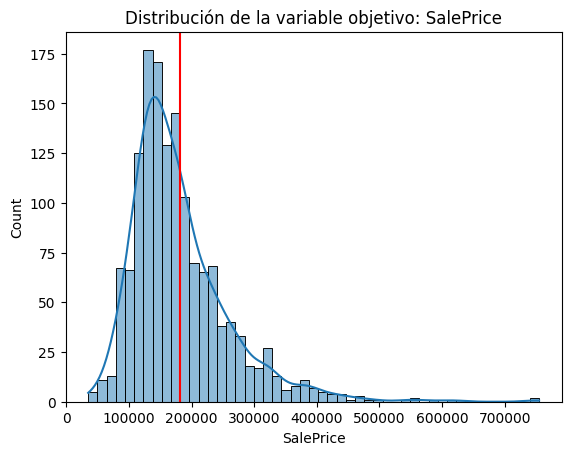

In [29]:
import seaborn as sns


y = all_data_df['SalePrice']
ax = sns.histplot(y, kde=True)
ax.axvline(y.mean(), color='red')
ax.set_title('Distribución de la variable objetivo: SalePrice')

6. Visualizar la correlación entre las variables numéricas.


Text(0.5, 1.0, 'Matriz de correlación')

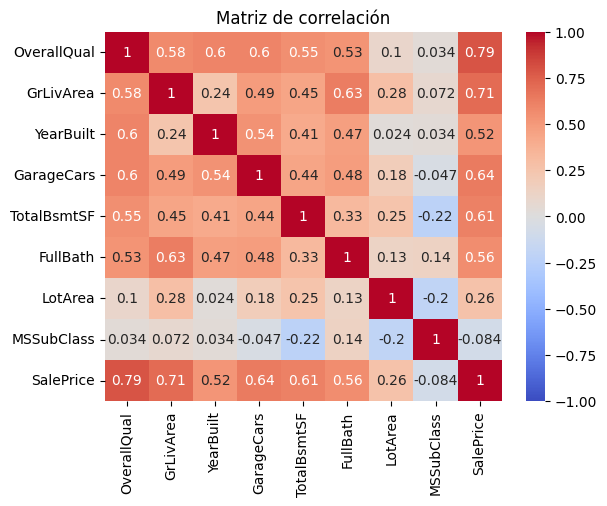

In [30]:
corr_matrix = all_data_df.corr(numeric_only=True)
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Matriz de correlación')

## 3. Preprocesamiento de los datos

Una vez que hemos explorado los datos, el siguiente paso es preprocesarlos. Para ello, seguiremos los siguientes pasos:

1. Tratar los datos nulos.
2. Codificar las variables categóricas.
3. Normalizar las variables numéricas.

In [31]:
X = all_data_df.drop(columns='SalePrice')
y = all_data_df['SalePrice']

### 3.1 Tratar los datos nulos

Vamos a ver cuantos datos nulos tenemos

In [32]:
X.isnull().sum()

OverallQual        0
GrLivArea          0
Neighborhood       0
YearBuilt          0
GarageCars         1
TotalBsmtSF        1
KitchenQual        1
FullBath           0
MSZoning           4
LotArea            0
MSSubClass         0
Street             0
LandContour        0
Utilities          2
HouseStyle         0
ExterCond          0
Foundation         0
BsmtQual          81
HeatingQC          0
GarageQual       159
PoolQC          2909
dtype: int64

Vamos a imputar los valores nulos de las variables categóricas con la moda y los valores nulos de las variables numéricas con la media.

In [33]:
# fill GarageCars, TotalBsmtSF, MSZoning and KitchenQual with the mode

def fill_df_column_with_mode(df, column):
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)
    return df

X = fill_df_column_with_mode(X, 'GarageCars')
X = fill_df_column_with_mode(X, 'TotalBsmtSF')
X = fill_df_column_with_mode(X, 'MSZoning')
X = fill_df_column_with_mode(X, 'KitchenQual')
X = fill_df_column_with_mode(X, 'Utilities')
X = fill_df_column_with_mode(X, 'BsmtQual')
X = fill_df_column_with_mode(X, 'GarageQual')
X = fill_df_column_with_mode(X, 'PoolQC')



Confirmamos que no hay valores nulos.

In [34]:
X.isnull().sum()

OverallQual     0
GrLivArea       0
Neighborhood    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
KitchenQual     0
FullBath        0
MSZoning        0
LotArea         0
MSSubClass      0
Street          0
LandContour     0
Utilities       0
HouseStyle      0
ExterCond       0
Foundation      0
BsmtQual        0
HeatingQC       0
GarageQual      0
PoolQC          0
dtype: int64

### 3.2 Normalizar las variables numéricas

Normalizar las variables numéricas es un paso importante en el preprocesamiento de los datos ya que permite que las variables tengan la misma escala, evitando que unas variables tengan más peso que otras en el modelo de Machine Learning. Para ello, utilizaremos el `StandardScaler` de `scikit-learn`.

El `StandardScaler` transforma las variables de forma que tengan media 0 y desviación estándar 1. Se diferencia del `MinMaxScaler` en que no transforma las variables a un rango específico, sino que las normaliza.

Veamos las variables numéricas que vamos a normalizar.

In [35]:
X.describe()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,MSSubClass
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,6.089072,1500.759849,1971.312778,1.766701,1051.417266,1.568003,10168.114080,57.137718
std,1.409947,506.051045,30.291442,0.761506,441.120498,0.552969,7886.996359,42.517628
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,1300.000000,20.000000
25%,5.000000,1126.000000,1953.500000,1.000000,793.000000,1.000000,7478.000000,20.000000
50%,6.000000,1444.000000,1973.000000,2.000000,989.000000,2.000000,9453.000000,50.000000
75%,7.000000,1743.500000,2001.000000,2.000000,1302.000000,2.000000,11570.000000,70.000000
max,10.000000,5642.000000,2010.000000,5.000000,6110.000000,4.000000,215245.000000,190.000000


Vamos a normalizar las variables numéricas utilizando el `StandardScaler`.

In [36]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

numeric_columns = ["GrLivArea", "YearBuilt", "TotalBsmtSF", "LotArea", "MSSubClass", "OverallQual", "GarageCars", "TotalBsmtSF", "FullBath"]
X_numeric_df = X[numeric_columns]
X_numeric_scaled_data = scaler.fit_transform(X_numeric_df)

# keep indexes "train" and "test" to split the data later
X_numeric_scaled_df = pd.DataFrame(
    X_numeric_scaled_data,
    index=X_numeric_df.index,
    columns=X_numeric_df.columns,
)
X_numeric_scaled_df.head()

GrLivArea  YearBuilt  TotalBsmtSF   LotArea  MSSubClass  OverallQual  \
train 0   0.413547   1.046258    -0.443078 -0.217879    0.067331     0.646183   
      1  -0.471891   0.154764     0.477463 -0.072044   -0.873616    -0.063185   
      2   0.563755   0.980221    -0.297968  0.137197    0.067331     0.646183   
      3   0.427382  -1.859351    -0.669812 -0.078385    0.302568     0.646183   
      4   1.378042   0.947203     0.212184  0.518903    0.067331     1.355551   

         GarageCars  TotalBsmtSF  FullBath  
train 0    0.306418    -0.443078  0.781366  
      1    0.306418     0.477463  0.781366  
      2    0.306418    -0.297968  0.781366  
      3    1.619830    -0.669812 -1.027363  
      4    1.619830     0.212184  0.781366

### 3.3 Codificar las variables categóricas

Recordemos que las variables categóricas deben ser codificadas para poder ser utilizadas en un modelo de Machine Learning. Para ello, utilizaremos el `LabelEncoder` de `scikit-learn`. Primero veamos cuales son las variables categóricas.

In [47]:
from sklearn.preprocessing import LabelEncoder


def label_encode_column(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

X.head()

OverallQual  GrLivArea  Neighborhood  YearBuilt  GarageCars  \
train 0            7       1710             5       2003         2.0   
      1            6       1262            24       1976         2.0   
      2            7       1786             5       2001         2.0   
      3            7       1717             6       1915         3.0   
      4            8       2198            15       2000         3.0   

         TotalBsmtSF  KitchenQual  FullBath  MSZoning  LotArea  ...  Street  \
train 0        856.0            2         2         3     8450  ...       1   
      1       1262.0            3         2         3     9600  ...       1   
      2        920.0            2         2         3    11250  ...       1   
      3        756.0            2         1         3     9550  ...       1   
      4       1145.0            2         2         3    14260  ...       1   

         LandContour  Utilities  HouseStyle  ExterCond  Foundation  BsmtQual  \
train 0            3          0           5          4           2         2   
      1            3          0           2          4           1         2   
      2            3          0           5          4           2         2   
      3            3          0           5          4           0         3   
      4            3          0           5          4           2         2   

         HeatingQC  GarageQual  PoolQC  
train 0          0           4       0  
      1          0           4       0  
      2          0           4       0  
      3          2           4       0  
      4          0           4       0  

[5 rows x 21 columns]

In [48]:
X = label_encode_column(X, 'Neighborhood')
X = label_encode_column(X, 'MSZoning')
X = label_encode_column(X, 'KitchenQual')
X = label_encode_column(X, 'LandContour')
X = label_encode_column(X, 'Utilities')
X = label_encode_column(X, 'HouseStyle')
X = label_encode_column(X, 'ExterCond')
X = label_encode_column(X, 'Foundation')
X = label_encode_column(X, 'BsmtQual')
X = label_encode_column(X, 'HeatingQC')
X = label_encode_column(X, 'GarageQual')
X = label_encode_column(X, 'PoolQC')
X = label_encode_column(X, 'Street')
X.head()


OverallQual  GrLivArea  Neighborhood  YearBuilt  GarageCars  \
train 0            7       1710             5       2003         2.0   
      1            6       1262            24       1976         2.0   
      2            7       1786             5       2001         2.0   
      3            7       1717             6       1915         3.0   
      4            8       2198            15       2000         3.0   

         TotalBsmtSF  KitchenQual  FullBath  MSZoning  LotArea  ...  Street  \
train 0        856.0            2         2         3     8450  ...       1   
      1       1262.0            3         2         3     9600  ...       1   
      2        920.0            2         2         3    11250  ...       1   
      3        756.0            2         1         3     9550  ...       1   
      4       1145.0            2         2         3    14260  ...       1   

         LandContour  Utilities  HouseStyle  ExterCond  Foundation  BsmtQual  \
train 0            3          0           5          4           2         2   
      1            3          0           2          4           1         2   
      2            3          0           5          4           2         2   
      3            3          0           5          4           0         3   
      4            3          0           5          4           2         2   

         HeatingQC  GarageQual  PoolQC  
train 0          0           4       0  
      1          0           4       0  
      2          0           4       0  
      3          2           4       0  
      4          0           4       0  

[5 rows x 21 columns]

Veamos cómo han quedado codificadas las variables categóricas.

In [49]:
categorical_columns = [
    "OverallQual",
    "GarageCars",
    "Neighborhood",
    "MSZoning",
    "KitchenQual",
    "FullBath",
    "LandContour",
    "Utilities",
    "HouseStyle",
    "ExterCond",
    "Foundation",
    "BsmtQual",
    "HeatingQC",
    "GarageQual",
    "PoolQC",
    "Street"
]
categorical_df = X[categorical_columns]
categorical_df.head()

OverallQual  GarageCars  Neighborhood  MSZoning  KitchenQual  \
train 0            7         2.0             5         3            2   
      1            6         2.0            24         3            3   
      2            7         2.0             5         3            2   
      3            7         3.0             6         3            2   
      4            8         3.0            15         3            2   

         FullBath  LandContour  Utilities  HouseStyle  ExterCond  Foundation  \
train 0         2            3          0           5          4           2   
      1         2            3          0           2          4           1   
      2         2            3          0           5          4           2   
      3         1            3          0           5          4           0   
      4         2            3          0           5          4           2   

         BsmtQual  HeatingQC  GarageQual  PoolQC  Street  
train 0         2          0           4       0       1  
      1         2          0           4       0       1  
      2         2          0           4       0       1  
      3         3          2           4       0       1  
      4         2          0           4       0       1

Ahora vamos a unir todas las variables en un solo DataFrame.

In [50]:
X_clean_df = pd.concat([X_numeric_scaled_df, categorical_df], axis=1)
X_clean_df

GrLivArea  YearBuilt  TotalBsmtSF   LotArea  MSSubClass  \
train 0      0.413547   1.046258    -0.443078 -0.217879    0.067331   
      1     -0.471891   0.154764     0.477463 -0.072044   -0.873616   
      2      0.563755   0.980221    -0.297968  0.137197    0.067331   
      3      0.427382  -1.859351    -0.669812 -0.078385    0.302568   
      4      1.378042   0.947203     0.212184  0.518903    0.067331   
...               ...        ...          ...       ...         ...   
test  1454  -0.807883  -0.043346    -1.145954 -1.043937    2.419700   
      1455  -0.807883  -0.043346    -1.145954 -1.049263    2.419700   
      1456  -0.546995  -0.373528     0.391304  1.246808   -0.873616   
      1457  -1.049006   0.683057    -0.316107  0.034605    0.655424   
      1458   0.986710   0.716075    -0.125650 -0.068620    0.067331   

            OverallQual  GarageCars  TotalBsmtSF  FullBath  OverallQual  ...  \
train 0        0.646183    0.306418    -0.443078  0.781366            7  ...   
      1       -0.063185    0.306418     0.477463  0.781366            6  ...   
      2        0.646183    0.306418    -0.297968  0.781366            7  ...   
      3        0.646183    1.619830    -0.669812 -1.027363            7  ...   
      4        1.355551    1.619830     0.212184  0.781366            8  ...   
...                 ...         ...          ...       ...          ...  ...   
test  1454    -1.481920   -2.320407    -1.145954 -1.027363            4  ...   
      1455    -1.481920   -1.006994    -1.145954 -1.027363            4  ...   
      1456    -0.772552    0.306418     0.391304 -1.027363            5  ...   
      1457    -0.772552   -2.320407    -0.316107 -1.027363            5  ...   
      1458     0.646183    1.619830    -0.125650  0.781366            7  ...   

            LandContour  Utilities  HouseStyle  ExterCond  Foundation  \
train 0               3          0           5          4           2   
      1               3          0           2          4           1   
      2               3          0           5          4           2   
      3               3          0           5          4           0   
      4               3          0           5          4           2   
...                 ...        ...         ...        ...         ...   
test  1454            3          0           5          4           1   
      1455            3          0           5          4           1   
      1456            3          0           2          4           1   
      1457            3          0           6          4           2   
      1458            3          0           5          4           2   

            BsmtQual  HeatingQC  GarageQual  PoolQC  Street  
train 0            2          0           4       0       1  
      1            2          0           4       0       1  
      2            2          0           4       0       1  
      3            3          2           4       0       1  
      4            2          0           4       0       1  
...              ...        ...         ...     ...     ...  
test  1454         3          2           4       0       1  
      1455         3          4           4       0       1  
      1456         3          0           4       0       1  
      1457         2          4           4       0       1  
      1458         2          0           4       0       1  

[2919 rows x 25 columns]

## 4. Split de los datos

Al estar en Kaggle y tener los datos de entrenamiento y test separados, no necesitamos dividir los datos en entrenamiento y test. Sin embargo, **vamos a dividir los datos de entrenamiento en entrenamiento y validación** para poder evaluar el rendimiento de nuestro modelo.

In [52]:
from sklearn.model_selection import train_test_split


SPLIT_RATIO = 0.2
SEED = 42


# estos son los datos limpios que usaremos para predecir y enviar a Kaggle
X_test = X_clean_df.xs('test')

# estos son los datos que usaremos para entrenar y validar nuestro modelo
X_train = X_clean_df.xs('train')
y_train = y.loc['train']

# dividimos los datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=SPLIT_RATIO, random_state=SEED
)

## 5. Entrenar un modelo

Una vez que hemos preprocesado los datos, el siguiente paso es entrenar un modelo. En este caso **se trata de un problema de regresión**, por lo que vamos a utilizar un modelo de regresión. En concreto, vamos a utilizar un **modelo de regresión lineal**. Este modelo se encuentra en la librería `scikit-learn` dentro de la clase `LinearRegression`.

In [53]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 6. Evaluar el modelo

Una vez que hemos entrenado el modelo, el siguiente paso es evaluarlo. Para ello, vamos a calcular el **error cuadrático medio** (RMSE) en el conjunto de validación.

In [54]:
from sklearn.metrics import root_mean_squared_error

# obtenemos las predicciones para los datos de validación
y_pred = model.predict(X_val)

# calculamos el error cuadrático medio comparando las predicciones con los valores reales
mse = root_mean_squared_error(y_val, y_pred)
f"Mean Squared Error: {mse:.2f}"

'Mean Squared Error: 38222.53'

## 7. Envío de los datos

Finalmente, una vez que hemos entrenado y evaluado el modelo, el último paso es predecir los precios de las casas en el conjunto de test y enviar los resultados a Kaggle para obtener la puntuación final.

¡Vamos a por ello! 🚀

El archivo `sample_submission.csv` contiene el formato en el que debemos enviar nuestras predicciones. Vamos a cargarlo para ver cómo debemos estructurar nuestros datos.

In [44]:
SAMPLE_SUBMISSION_CSV = '../data/sample_submission.csv'
sample_submission_df = pd.read_csv(SAMPLE_SUBMISSION_CSV)
sample_submission_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Vemos que tiene 2 columnas: `Id` y `SalePrice`. `Id` es el identificador de la casa y `SalePrice` es el precio que debemos predecir. vamos a obtener las predicciones de nuestro modelo y a guardarlas en un DataFrame con esas columnas.

In [ ]:
test_predictions = model.predict(X_test)
test_ids = test_df['Id']
submission_data = {
    'Id': test_ids,
    'SalePrice': test_predictions,
}
submission_df = pd.DataFrame(submission_data)
submission_df.head()
submission_df.to_csv('../data/submission.csv', index=False)

,Id,SalePrice
0,1461,108843.159318
1,1462,169241.442515
2,1463,170984.674120
3,1464,185303.595198
4,1465,199265.018849


Guardamos las predicciones en un archivo CSV para enviar a Kaggle.

In [46]:
submission_df.to_csv('../data/submission.csv', index=False)